In [41]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
from sklearn import datasets, model_selection, linear_model, ensemble,neighbors 
from sklearn.metrics import mean_squared_error,accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import plot_importance 
from xgboost import XGBClassifier
import plotly.graph_objs as go
import plotly.express as px

#matplotlib그래프에서 한글 폰트 사용
import matplotlib
from matplotlib import font_manager,rc
font_path = "/Users/ejju/Desktop/3rd_project/dataset_window_0721/NanumGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)

In [42]:
df = pd.read_csv('final_fire_weather_7yr.csv') 
df.head(3)

,산불발생여부,발생장소_시도,관측일,일최고기온,일평균현지기압,일최고현지기압,일최저현지기압,일평균해면기압,일최고해면기압,일최저해면기압,...,일평균풍속,일최대풍속,일최대풍속풍향,일최대순간풍속,일최대순간풍속풍향,풍정합,일강수량,일평균전운량,최다운량,일합계일사량
0,0,강원,20140101,6.362,985.015,988.123,982.354,1012.215,1015.362,1009.331,...,3.985,7.831,237.692,14.585,256.923,3449.692,0.0,2.850,8.00,6.922
1,0,경북,20140101,8.686,998.207,1000.529,994.764,1013.293,1015.679,1009.800,...,3.557,7.436,276.429,13.836,277.857,3067.286,0.1,2.075,6.25,9.260
2,0,경북,20140102,8.664,1004.921,1006.907,1000.486,1020.286,1022.336,1015.629,...,2.300,5.436,262.857,9.036,288.571,1984.714,0.0,2.600,6.00,9.880


In [30]:
df.columns

Index(['산불발생여부', '발생장소_시도', '관측일', '일최고기온', '일평균현지기압', '일최고현지기압', '일최저현지기압',
       '일평균해면기압', '일최고해면기압', '일최저해면기압', '일평균상대습도', '일최소상대습도', '일평균수증기압',
       '일최고수증기압', '일최저수증기압', '일평균풍속', '일최대풍속', '일최대풍속풍향', '일최대순간풍속',
       '일최대순간풍속풍향', '풍정합', '일강수량', '일평균전운량', '최다운량', '일합계일사량'],
      dtype='object')

In [43]:
df.drop(['발생장소_시도', '관측일'], axis=1, inplace=True)

In [37]:
X = df[df.columns.difference(['산불발생여부'])]
y = df[['산불발생여부']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(df.shape)

(4401, 22)
(1101, 22)
(4401, 1)
(1101, 1)
(5502, 23)


In [39]:
# target(Price)와 가장 correlated 된 features 를 k개 고르기.
## f_regresison, SelectKBest 불러오기.
from sklearn.feature_selection import f_regression, SelectKBest
## selctor 정의하기.
selector = SelectKBest(score_func=f_regression, k=10)
## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)
## 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)
X_train_selected.shape, X_test_selected.shape

/Users/ejju/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


((4401, 10), (1101, 10))

In [40]:
#선정된 10개의 변수들 확인하기
all_names = X_train.columns
## selector.get_support()
selected_mask = selector.get_support()
## 선택된 특성(변수)들
selected_names = all_names[selected_mask]
## 선택되지 않은 특성(변수)들
unselected_names = all_names[~selected_mask]
print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)


Selected names:  Index(['일최고수증기압', '일최대순간풍속', '일최대풍속', '일최소상대습도', '일최저수증기압', '일평균상대습도',
       '일평균수증기압', '일평균전운량', '일합계일사량', '최다운량'],
      dtype='object')
Unselected names:  Index(['일강수량', '일최고기온', '일최고해면기압', '일최고현지기압', '일최대순간풍속풍향', '일최대풍속풍향',
       '일최저해면기압', '일최저현지기압', '일평균풍속', '일평균해면기압', '일평균현지기압', '풍정합'],
      dtype='object')


In [33]:
#df.to_csv('0722_revised_var.csv', index=False)

In [16]:
df.columns

Index(['산불발생여부', '일최고기온', '일평균현지기압', '일최고현지기압', '일최저현지기압', '일평균해면기압',
       '일최고해면기압', '일최저해면기압', '일평균상대습도', '일최소상대습도', '일평균수증기압', '일최고수증기압',
       '일최저수증기압', '일평균풍속', '일최대풍속', '일최대풍속풍향', '일최대순간풍속', '일최대순간풍속풍향', '풍정합',
       '일강수량', '일평균전운량', '최다운량', '일합계일사량'],
      dtype='object')

In [17]:
df['일최고기온'].describe()

count    5502.000000
mean       18.044650
std         9.594198
min        -9.493000
25%         9.643000
50%        19.555500
75%        26.070500
max        37.864000
Name: 일최고기온, dtype: float64

<AxesSubplot:xlabel='일최고기온_bins'>

/Users/ejju/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ejju/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ejju/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ejju/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ejju/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.pri

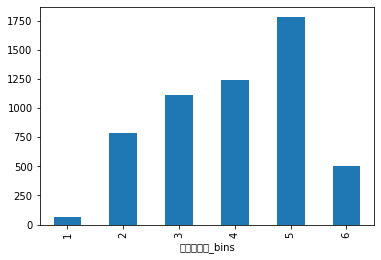

In [44]:
#numpy-histogram
#전체 개수를 구간을 분할해서 보여줌
cnt,bins=np.histogram(df.일최고기온, bins=6)
cnt,bins
#pandas-cut
df['일최고기온_bins']=pd.cut(x=df.일최고기온,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.일최고기온_bins
df.groupby(['일최고기온_bins'])['산불발생여부'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMaxT_bins'>

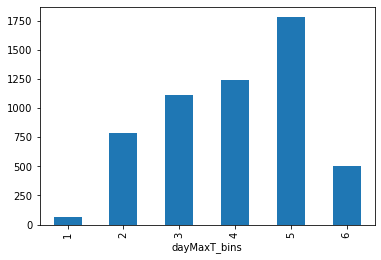

In [44]:
cnt,bins=np.histogram(df.dayMaxT, bins=6)
cnt,bins

df['dayMaxT_bins']=pd.cut(x=df.dayMaxT,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMaxT_bins
df.groupby(['dayMaxT_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMinT_bins'>

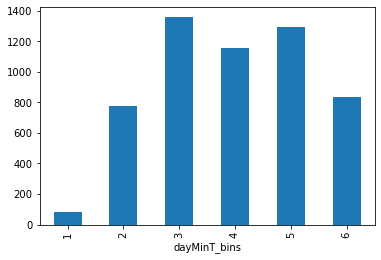

In [45]:
cnt,bins=np.histogram(df.dayMinT, bins=6)
cnt,bins

df['dayMinT_bins']=pd.cut(x=df.dayMinT,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMinT_bins
df.groupby(['dayMinT_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgP_bins'>

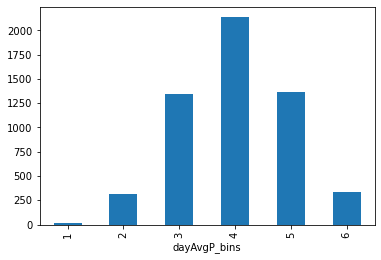

In [46]:
cnt,bins=np.histogram(df.dayAvgP, bins=6)
cnt,bins

df['dayAvgP_bins']=pd.cut(x=df.dayAvgP,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgP_bins
df.groupby(['dayAvgP_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMaxP_bins'>

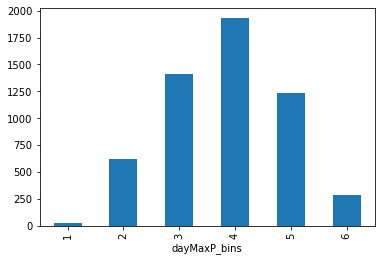

In [47]:
cnt,bins=np.histogram(df.dayMaxP, bins=6)
cnt,bins

df['dayMaxP_bins']=pd.cut(x=df.dayMaxP,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMaxP_bins
df.groupby(['dayMaxP_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMinP_bins'>

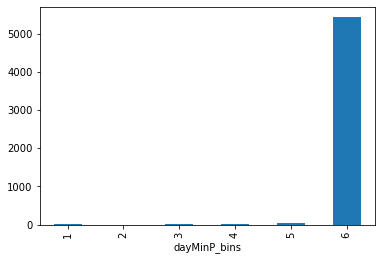

In [48]:
cnt,bins=np.histogram(df.dayMinP, bins=6)
cnt,bins

df['dayMinP_bins']=pd.cut(x=df.dayMinP,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMinP_bins
df.groupby(['dayMinP_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgPsea_bins'>

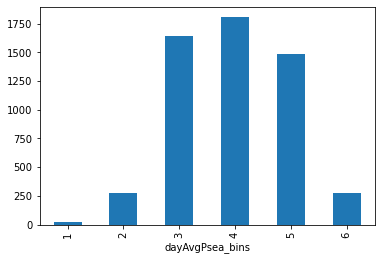

In [49]:
cnt,bins=np.histogram(df.dayAvgPsea, bins=6)
cnt,bins

df['dayAvgPsea_bins']=pd.cut(x=df.dayAvgPsea,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgPsea_bins
df.groupby(['dayAvgPsea_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMaxPsea_bins'>

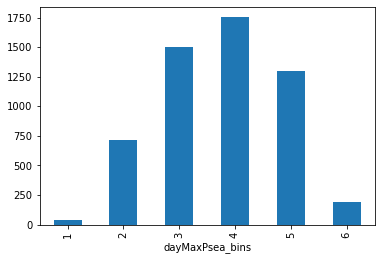

In [50]:
cnt,bins=np.histogram(df.dayMaxPsea, bins=6)
cnt,bins

df['dayMaxPsea_bins']=pd.cut(x=df.dayMaxPsea,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMaxPsea_bins
df.groupby(['dayMaxPsea_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMinPsea_bins'>

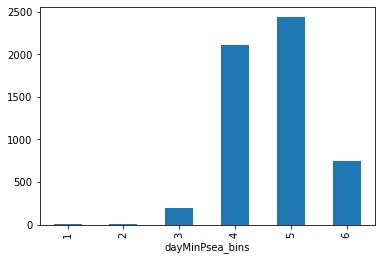

In [51]:
cnt,bins=np.histogram(df.dayMinPsea, bins=6)
cnt,bins

df['dayMinPsea_bins']=pd.cut(x=df.dayMinPsea,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMinPsea_bins
df.groupby(['dayMinPsea_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgRhm_bins'>

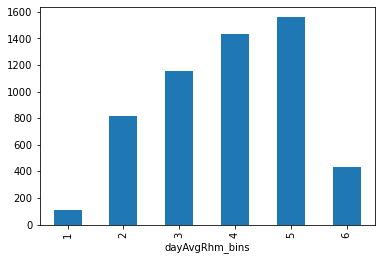

In [52]:
cnt,bins=np.histogram(df.dayAvgRhm, bins=6)
cnt,bins

df['dayAvgRhm_bins']=pd.cut(x=df.dayAvgRhm,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgRhm_bins
df.groupby(['dayAvgRhm_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMinRhm_bins'>

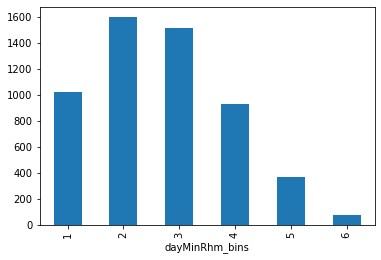

In [53]:
cnt,bins=np.histogram(df.dayMinRhm, bins=6)
cnt,bins

df['dayMinRhm_bins']=pd.cut(x=df.dayMinRhm,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMinRhm_bins
df.groupby(['dayMinRhm_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgWaterP_bins'>

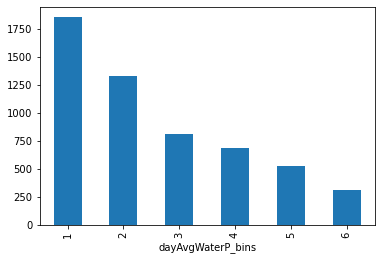

In [54]:
cnt,bins=np.histogram(df.dayAvgWaterP, bins=6)
cnt,bins

df['dayAvgWaterP_bins']=pd.cut(x=df.dayAvgWaterP,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgWaterP_bins
df.groupby(['dayAvgWaterP_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMaxWaterP_bins'>

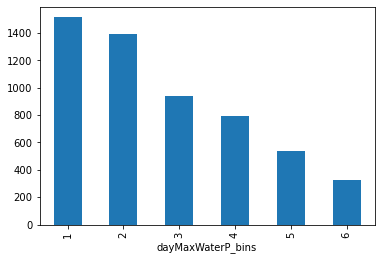

In [55]:
cnt,bins=np.histogram(df.dayMaxWaterP, bins=6)
cnt,bins

df['dayMaxWaterP_bins']=pd.cut(x=df.dayMaxWaterP,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMaxWaterP_bins
df.groupby(['dayMaxWaterP_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMinWaterP_bins'>

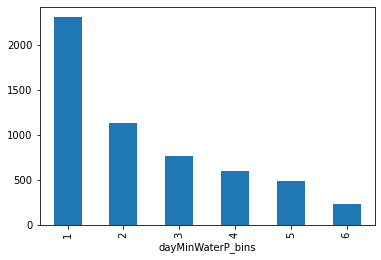

In [56]:
cnt,bins=np.histogram(df.dayMinWaterP, bins=6)
cnt,bins

df['dayMinWaterP_bins']=pd.cut(x=df.dayMinWaterP,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMinWaterP_bins
df.groupby(['dayMinWaterP_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgWS_bins'>

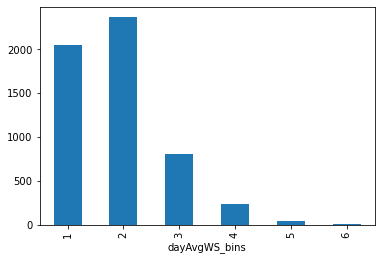

In [57]:
cnt,bins=np.histogram(df.dayAvgWS, bins=6)
cnt,bins

df['dayAvgWS_bins']=pd.cut(x=df.dayAvgWS,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgWS_bins
df.groupby(['dayAvgWS_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMaxWS_bins'>

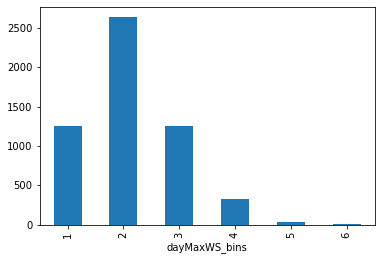

In [58]:
cnt,bins=np.histogram(df.dayMaxWS, bins=6)
cnt,bins

df['dayMaxWS_bins']=pd.cut(x=df.dayMaxWS,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMaxWS_bins
df.groupby(['dayMaxWS_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMaxWSWD_bins'>

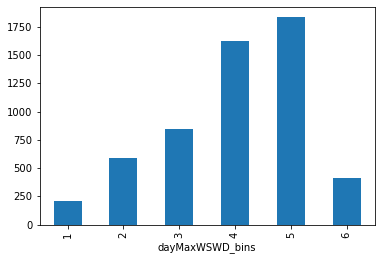

In [59]:
cnt,bins=np.histogram(df.dayMaxWSWD, bins=6)
cnt,bins

df['dayMaxWSWD_bins']=pd.cut(x=df.dayMaxWSWD,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMaxWSWD_bins
df.groupby(['dayMaxWSWD_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMaxInsWS_bins'>

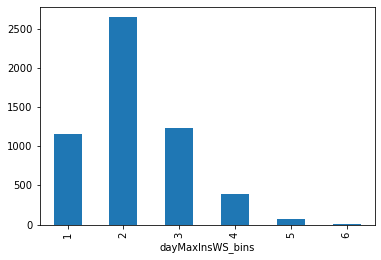

In [60]:
cnt,bins=np.histogram(df.dayMaxInsWS, bins=6)
cnt,bins

df['dayMaxInsWS_bins']=pd.cut(x=df.dayMaxInsWS,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMaxInsWS_bins
df.groupby(['dayMaxInsWS_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMaxInsWSWD_bins'>

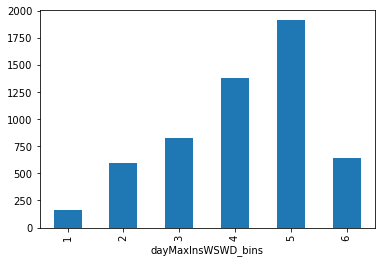

In [61]:
cnt,bins=np.histogram(df.dayMaxInsWSWD, bins=6)
cnt,bins

df['dayMaxInsWSWD_bins']=pd.cut(x=df.dayMaxInsWSWD,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMaxInsWSWD_bins
df.groupby(['dayMaxInsWSWD_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='hr24sumRws_bins'>

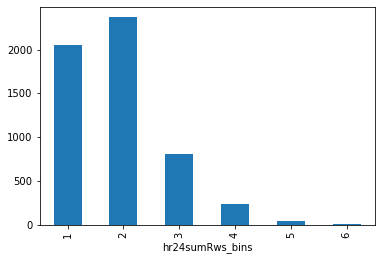

In [62]:
cnt,bins=np.histogram(df.hr24sumRws, bins=6)
cnt,bins

df['hr24sumRws_bins']=pd.cut(x=df.hr24sumRws,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.hr24sumRws_bins
df.groupby(['hr24sumRws_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgCloud_bins'>

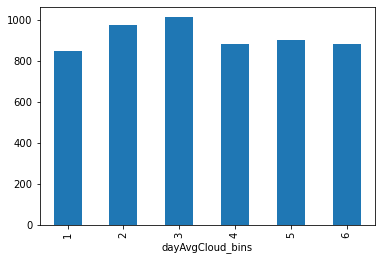

In [63]:
cnt,bins=np.histogram(df.dayAvgCloud, bins=6)
cnt,bins

df['dayAvgCloud_bins']=pd.cut(x=df.dayAvgCloud,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgCloud_bins
df.groupby(['dayAvgCloud_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgMiddleLowCloud_bins'>

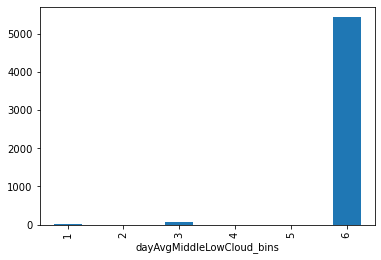

In [64]:
cnt,bins=np.histogram(df.dayAvgMiddleLowCloud, bins=6)
cnt,bins

df['dayAvgMiddleLowCloud_bins']=pd.cut(x=df.dayAvgMiddleLowCloud,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgMiddleLowCloud_bins
df.groupby(['dayAvgMiddleLowCloud_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='maxCloud_bins'>

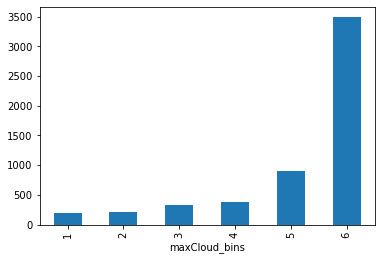

In [65]:
cnt,bins=np.histogram(df.maxCloud, bins=6)
cnt,bins

df['maxCloud_bins']=pd.cut(x=df.maxCloud,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.maxCloud_bins
df.groupby(['maxCloud_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='sumSS_hr_bins'>

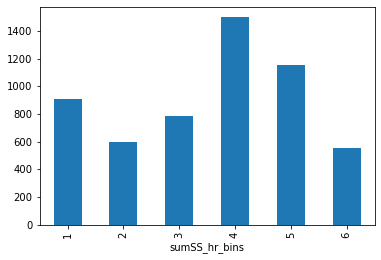

In [66]:
cnt,bins=np.histogram(df.sumSS_hr, bins=6)
cnt,bins

df['sumSS_hr_bins']=pd.cut(x=df.sumSS_hr,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.sumSS_hr_bins
df.groupby(['sumSS_hr_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='daySumSunRay_bins'>

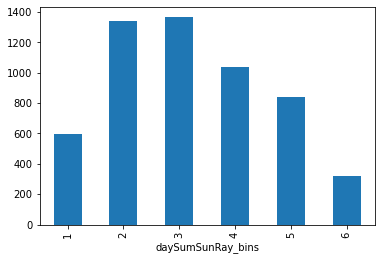

In [67]:
cnt,bins=np.histogram(df.daySumSunRay, bins=6)
cnt,bins

df['daySumSunRay_bins']=pd.cut(x=df.daySumSunRay,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.daySumSunRay_bins
df.groupby(['daySumSunRay_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgGroundT_bins'>

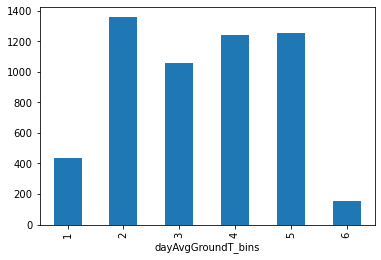

In [68]:
cnt,bins=np.histogram(df.dayAvgGroundT, bins=6)
cnt,bins

df['dayAvgGroundT_bins']=pd.cut(x=df.dayAvgGroundT,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgGroundT_bins
df.groupby(['dayAvgGroundT_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgGroundT_bins'>

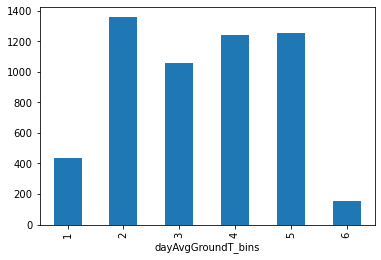

In [70]:
cnt,bins=np.histogram(df.dayAvgGroundT, bins=6)
cnt,bins

df['dayAvgGroundT_bins']=pd.cut(x=df.dayAvgGroundT,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgGroundT_bins
df.groupby(['dayAvgGroundT_bins'])['fire'].count().plot(kind='bar')

In [188]:
y_data = df[['fire']] #산불발생여부
x_data = df.copy()  #그 외 모든 데이터
x_data.drop(['fire','location','Date'], axis=1, inplace=True)